In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import admg_rkhs2
import pandas as pd
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/envs/admg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# sin

In [2]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = 10*torch.sin(x1)+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005


  0%|          | 11/33000.0 [00:00<13:21, 41.18it/s] 


Inner iteration 0
	h(W(model)): 0.017940128668342048
	score(model): 2.504012603122777
Step 0: mle = 24.788235344132996
Step 0: mse = 12.430189188287645
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1011/33000.0 [00:10<05:29, 97.19it/s]


Inner iteration 1000
	h(W(model)): 0.03653970521948535
	score(model): 0.14554655466656521
Step 1000: mle = 1.0883942450364525
Step 1000: mse = 0.8996051373905662
Step 1000: Sigma = tensor([[0.2596, 0.0000],
        [0.0000, 1.4692]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2018/33000.0 [00:21<05:11, 99.60it/s] 


Inner iteration 2000
	h(W(model)): 0.03615752240775727
	score(model): 0.1456343690230425
Step 2000: mle = 1.0930918743969835
Step 2000: mse = 0.8990554978911401
Step 2000: Sigma = tensor([[0.2608, 0.0000],
        [0.0000, 1.4016]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3021/33000.0 [00:31<05:00, 99.93it/s] 


Inner iteration 3000
	h(W(model)): 0.036181361817649194
	score(model): 0.14562335426955914
Step 3000: mle = 1.0927423688325737
Step 3000: mse = 0.8989374275862417
Step 3000: Sigma = tensor([[0.2607, 0.0000],
        [0.0000, 1.3993]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4017/33000.0 [00:41<04:52, 99.04it/s]


Inner iteration 4000
	h(W(model)): 0.036186761744434026
	score(model): 0.14561883076702697
Step 4000: mle = 1.0926431412466118
Step 4000: mse = 0.8989231347757092
Step 4000: Sigma = tensor([[0.2606, 0.0000],
        [0.0000, 1.3993]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5010/33000.0 [00:51<04:43, 98.89it/s] 


Inner iteration 4999
	h(W(model)): 0.036188703986997695
	score(model): 0.14561818624713585
Step 4999: mle = 1.0926172722307192
Step 4999: mse = 0.8989192836766404
Step 4999: Sigma = tensor([[0.2606, 0.0000],
        [0.0000, 1.3993]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.47716517825962246
	score(model): 0.5883295899916078
Step 0: mle = 2.2147380149922533
Step 0: mse = 1.4100234275870658
Step 0: Sigma = tensor([[0.2636, 0.0000],
        [0.0000, 1.4023]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6014/33000.0 [01:01<04:39, 96.51it/s]


Inner iteration 1000
	h(W(model)): 0.0065411653620421895
	score(model): 0.08150628865200847
Step 1000: mle = 1.497607858440609
Step 1000: mse = 0.9654445347935129
Step 1000: Sigma = tensor([[0.3810, 0.0000],
        [0.0000, 1.3216]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7020/33000.0 [01:12<04:28, 96.91it/s]


Inner iteration 2000
	h(W(model)): 0.00650203286810358
	score(model): 0.08153703363230853
Step 2000: mle = 1.4990000737202565
Step 2000: mse = 0.9654129596947728
Step 2000: Sigma = tensor([[0.3817, 0.0000],
        [0.0000, 1.3158]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8012/33000.0 [01:22<04:19, 96.44it/s]


Inner iteration 3000
	h(W(model)): 0.006494420532232592
	score(model): 0.08154100414820398
Step 3000: mle = 1.499231625146782
Step 3000: mse = 0.9654558042554077
Step 3000: Sigma = tensor([[0.3818, 0.0000],
        [0.0000, 1.3158]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9020/33000.0 [01:32<04:06, 97.20it/s]


Inner iteration 4000
	h(W(model)): 0.0064933033837819565
	score(model): 0.08154230898484291
Step 4000: mle = 1.4992800636088779
Step 4000: mse = 0.9654651020913234
Step 4000: Sigma = tensor([[0.3818, 0.0000],
        [0.0000, 1.3158]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10013/33000.0 [01:43<03:57, 96.77it/s]


Inner iteration 4999
	h(W(model)): 0.006497089837112391
	score(model): 0.08154517342051065
Step 4999: mle = 1.4992617842129583
Step 4999: mse = 0.9654733511536219
Step 4999: Sigma = tensor([[0.3818, 0.0000],
        [0.0000, 1.3158]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.164704933829828
	score(model): 1.2244190677692874
Step 0: mle = 2.3826030796037365
Step 0: mse = 1.381595022555434
Step 0: Sigma = tensor([[0.3848, 0.0000],
        [0.0000, 1.3188]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11013/33000.0 [01:53<03:48, 96.12it/s]


Inner iteration 1000
	h(W(model)): 0.0015276013577927294
	score(model): 0.042840737802912005
Step 1000: mle = 1.6508694310346679
Step 1000: mse = 1.0127058176454296
Step 1000: Sigma = tensor([[0.4263, 0.0000],
        [0.0000, 1.4042]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12014/33000.0 [02:04<03:38, 96.11it/s]


Inner iteration 2000
	h(W(model)): 0.0014956289508862852
	score(model): 0.04333221147152657
Step 2000: mle = 1.671751626788243
Step 2000: mse = 1.005987932432461
Step 2000: Sigma = tensor([[0.4264, 0.0000],
        [0.0000, 1.2117]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13015/33000.0 [02:14<03:24, 97.57it/s]


Inner iteration 3000
	h(W(model)): 0.0014930847193759256
	score(model): 0.04332644940687133
Step 3000: mle = 1.6716256661549773
Step 3000: mse = 1.0060754643718115
Step 3000: Sigma = tensor([[0.4264, 0.0000],
        [0.0000, 1.2131]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14015/33000.0 [02:24<03:19, 95.23it/s]


Inner iteration 4000
	h(W(model)): 0.001492616100667643
	score(model): 0.043326784068428874
Step 4000: mle = 1.6716578234301567
Step 4000: mse = 1.0060826332574626
Step 4000: Sigma = tensor([[0.4265, 0.0000],
        [0.0000, 1.2131]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15016/33000.0 [02:35<03:09, 94.79it/s]


Inner iteration 4999
	h(W(model)): 0.00149731194589231
	score(model): 0.04333065851822399
Step 4999: mle = 1.67162492996413
Step 4999: mse = 1.006076596811841
Step 4999: Sigma = tensor([[0.4264, 0.0000],
        [0.0000, 1.2131]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.2037751067596245
	score(model): 1.2352536343745475
Step 0: mle = 2.512254137369334
Step 0: mse = 1.3891658007365506
Step 0: Sigma = tensor([[0.4294, 0.0000],
        [0.0000, 1.2161]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16018/33000.0 [02:45<02:55, 96.69it/s]


Inner iteration 1000
	h(W(model)): 0.000411322772519096
	score(model): 0.022249349753334327
Step 1000: mle = 1.7453836948016785
Step 1000: mse = 1.0559009666140944
Step 1000: Sigma = tensor([[0.4377, 0.0000],
        [0.0000, 1.4789]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17019/33000.0 [02:56<02:44, 97.24it/s]


Inner iteration 2000
	h(W(model)): 0.0003803984827084328
	score(model): 0.022983001525479885
Step 2000: mle = 1.806517630372997
Step 2000: mse = 1.0397905081829273
Step 2000: Sigma = tensor([[0.4350, 0.0000],
        [0.0000, 1.0937]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18019/33000.0 [03:06<02:35, 96.60it/s]


Inner iteration 3000
	h(W(model)): 0.000379869432137081
	score(model): 0.022992071237377412
Step 3000: mle = 1.8072626672690815
Step 3000: mse = 1.0396393168340308
Step 3000: Sigma = tensor([[0.4351, 0.0000],
        [0.0000, 1.0914]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19020/33000.0 [03:17<02:25, 96.36it/s]


Inner iteration 4000
	h(W(model)): 0.00038895996710319736
	score(model): 0.023000817918741923
Step 4000: mle = 1.8072349199322648
Step 4000: mse = 1.0396283710662273
Step 4000: Sigma = tensor([[0.4351, 0.0000],
        [0.0000, 1.0913]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20010/33000.0 [03:27<02:15, 96.06it/s]


Inner iteration 4999
	h(W(model)): 0.00043286747664872394
	score(model): 0.023048047290202663
Step 4999: mle = 1.8075007475686191
Step 4999: mse = 1.0396853253596843
Step 4999: Sigma = tensor([[0.4351, 0.0000],
        [0.0000, 1.0913]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.719939615772252
	score(model): 1.735692671237937
Step 0: mle = 2.5146972354606785
Step 0: mse = 1.3857633940204594
Step 0: Sigma = tensor([[0.4381, 0.0000],
        [0.0000, 1.0943]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21018/33000.0 [03:38<02:07, 94.22it/s]


Inner iteration 1000
	h(W(model)): 0.00012025275166394067
	score(model): 0.011698400491669118
Step 1000: mle = 1.8509033627993259
Step 1000: mse = 1.099171194394175
Step 1000: Sigma = tensor([[0.4188, 0.0000],
        [0.0000, 1.3462]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22019/33000.0 [03:49<01:57, 93.36it/s]


Inner iteration 2000
	h(W(model)): 0.00010419470299405376
	score(model): 0.012491960712407553
Step 2000: mle = 1.9803438371050341
Step 2000: mse = 1.0777052028689098
Step 2000: Sigma = tensor([[0.4211, 0.0000],
        [0.0000, 0.9603]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23019/33000.0 [03:59<01:45, 94.36it/s]


Inner iteration 3000
	h(W(model)): 0.00010420204974659342
	score(model): 0.012484396113556104
Step 3000: mle = 1.9791155901763737
Step 3000: mse = 1.077815102756769
Step 3000: Sigma = tensor([[0.4211, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24010/33000.0 [04:10<01:37, 91.80it/s]


Inner iteration 4000
	h(W(model)): 0.00010417852453903365
	score(model): 0.012484359539358322
Step 4000: mle = 1.9791133002873522
Step 4000: mse = 1.077817394592844
Step 4000: Sigma = tensor([[0.4211, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25012/33000.0 [04:21<01:24, 94.32it/s]


Inner iteration 4999
	h(W(model)): 0.00010515814734946005
	score(model): 0.012484987848536038
Step 4999: mle = 1.9790584200597099
Step 4999: mse = 1.0778048271865572
Step 4999: Sigma = tensor([[0.4212, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.6505199609710477
	score(model): 1.6597975519332675
Step 0: mle = 2.9689054141556426
Step 0: mse = 1.4777696632828927
Step 0: Sigma = tensor([[0.4242, 0.0000],
        [0.0000, 0.9592]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26012/33000.0 [04:31<01:14, 93.66it/s]


Inner iteration 1000
	h(W(model)): 0.0001252186476574657
	score(model): 0.006565614066445626
Step 1000: mle = 2.0595650645634462
Step 1000: mse = 1.2786371426248224
Step 1000: Sigma = tensor([[0.3964, 0.0000],
        [0.0000, 1.6573]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27012/33000.0 [04:42<01:04, 93.56it/s]


Inner iteration 2000
	h(W(model)): 3.05680565255706e-05
	score(model): 0.006943285854744297
Step 2000: mle = 2.210748816559219
Step 2000: mse = 1.1537002803195355
Step 2000: Sigma = tensor([[0.3914, 0.0000],
        [0.0000, 0.9121]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28012/33000.0 [04:53<00:52, 94.99it/s]


Inner iteration 3000
	h(W(model)): 3.0605722954657466e-05
	score(model): 0.0071022711061011715
Step 3000: mle = 2.2612140723618035
Step 3000: mse = 1.1375487489965843
Step 3000: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8399]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29015/33000.0 [05:04<00:47, 83.21it/s]


Inner iteration 4000
	h(W(model)): 3.075060410262509e-05
	score(model): 0.007102608730479705
Step 4000: mle = 2.2612787399084064
Step 4000: mse = 1.1375248982699797
Step 4000: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30010/33000.0 [05:17<00:37, 78.84it/s]


Inner iteration 5000
	h(W(model)): 3.733272320216585e-05
	score(model): 0.007109880630992569
Step 5000: mle = 2.261499564854351
Step 5000: mse = 1.1376015032897049
Step 5000: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8399]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31013/33000.0 [05:28<00:21, 94.14it/s]


Inner iteration 6000
	h(W(model)): 4.989999405236034e-05
	score(model): 0.007122238754387385
Step 6000: mle = 2.2614326554839796
Step 6000: mse = 1.1375650665830768
Step 6000: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32013/33000.0 [05:38<00:10, 92.88it/s]


Inner iteration 7000
	h(W(model)): 4.572152236104188e-05
	score(model): 0.007117942355735116
Step 7000: mle = 2.2613948170258835
Step 7000: mse = 1.1375816959820415
Step 7000: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


100%|██████████| 33000/33000.0 [05:49<00:00, 94.47it/s]


Inner iteration 7999
	h(W(model)): 6.273361307451708e-05
	score(model): 0.007132521674157848
Step 7999: mle = 2.2606183588284265
Step 7999: mse = 1.1373277633554193
Step 7999: Sigma = tensor([[0.3915, 0.0000],
        [0.0000, 0.8399]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 8.5164e+00],
        [1.3152e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3915, 0.0000],
        [0.0000, 0.8399]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 8.51643826e+00]
 [1.31524647e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39148617 0.        ]
 [0.         0.83986395]]


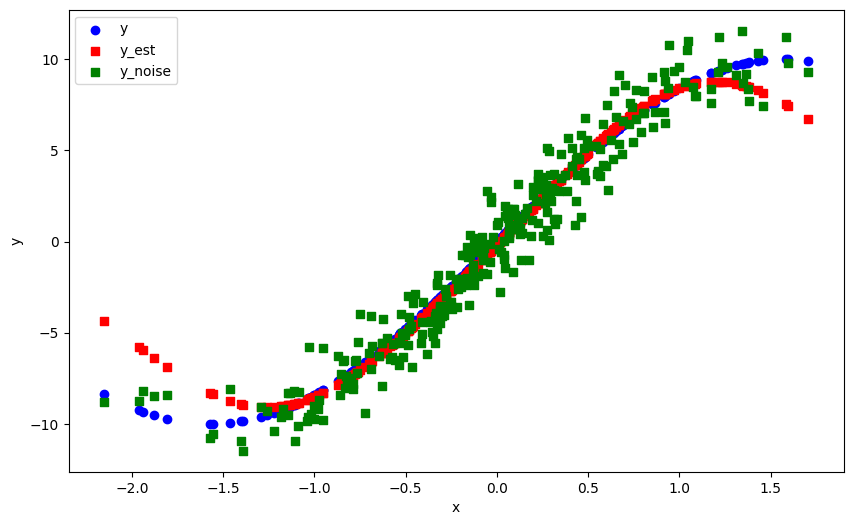

The programm is closed


In [5]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

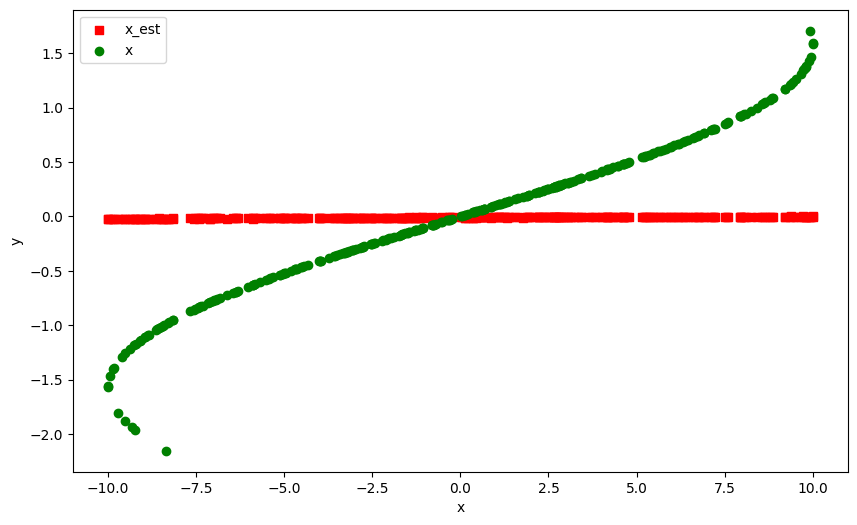

The programm is closed


In [6]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# quadratic

In [7]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**2
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = x1**2+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:24, 74.23it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.1333287022905445
	score(model): 0.43827819488867253
Step 0: mle = 3.0460783351947742
Step 0: mse = 1.5246009151236786
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1015/33000.0 [00:10<05:20, 99.79it/s] 


Inner iteration 1000
	h(W(model)): 0.00155433040927333
	score(model): 0.17093843992422417
Step 1000: mle = 1.693550878697901
Step 1000: mse = 1.0046997879272355
Step 1000: Sigma = tensor([[0.4750, 0.0000],
        [0.0000, 1.3914]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2012/33000.0 [00:20<05:11, 99.36it/s] 


Inner iteration 2000
	h(W(model)): 0.0015144199684860027
	score(model): 0.17091687447524317
Step 2000: mle = 1.6937386190112051
Step 2000: mse = 1.0048260963292932
Step 2000: Sigma = tensor([[0.4734, 0.0000],
        [0.0000, 1.3951]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3017/33000.0 [00:30<04:57, 100.93it/s]


Inner iteration 3000
	h(W(model)): 0.0015141484888983037
	score(model): 0.17091682193832702
Step 3000: mle = 1.6937407917317993
Step 3000: mse = 1.004829389003084
Step 3000: Sigma = tensor([[0.4734, 0.0000],
        [0.0000, 1.3952]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4019/33000.0 [00:40<04:50, 99.91it/s] 


Inner iteration 4000
	h(W(model)): 0.001514162162858046
	score(model): 0.17091678434604063
Step 4000: mle = 1.6937402787177918
Step 4000: mse = 1.0048292845652895
Step 4000: Sigma = tensor([[0.4734, 0.0000],
        [0.0000, 1.3952]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5010/33000.0 [00:50<04:42, 99.06it/s] 


Inner iteration 4999
	h(W(model)): 0.0015143576900817912
	score(model): 0.17091684903246412
Step 4999: mle = 1.6937389612367717
Step 4999: mse = 1.0048282900382395
Step 4999: Sigma = tensor([[0.4734, 0.0000],
        [0.0000, 1.3952]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.27975203725997133
	score(model): 0.47462189753626527
Step 0: mle = 3.887607851110135
Step 0: mse = 2.0470860714565275
Step 0: Sigma = tensor([[0.4764, 0.0000],
        [0.0000, 1.3982]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6015/33000.0 [01:00<04:33, 98.76it/s] 


Inner iteration 1000
	h(W(model)): 0.0004289957807253053
	score(model): 0.08663670646657888
Step 1000: mle = 1.723874589688951
Step 1000: mse = 1.0123672542818316
Step 1000: Sigma = tensor([[0.4761, 0.0000],
        [0.0000, 1.3069]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7017/33000.0 [01:10<04:24, 98.23it/s] 


Inner iteration 2000
	h(W(model)): 0.00044039423024822
	score(model): 0.08659276004545091
Step 2000: mle = 1.7227611978568191
Step 2000: mse = 1.0121951506468843
Step 2000: Sigma = tensor([[0.4753, 0.0000],
        [0.0000, 1.3123]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8021/33000.0 [01:21<04:12, 99.07it/s] 


Inner iteration 3000
	h(W(model)): 0.00044035865302571864
	score(model): 0.08659274872318959
Step 3000: mle = 1.7227617005365463
Step 3000: mse = 1.0121958962317887
Step 3000: Sigma = tensor([[0.4753, 0.0000],
        [0.0000, 1.3124]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9018/33000.0 [01:31<04:03, 98.64it/s] 


Inner iteration 4000
	h(W(model)): 0.00044035633735228785
	score(model): 0.08659275502977977
Step 4000: mle = 1.7227618750183584
Step 4000: mse = 1.0121959444574835
Step 4000: Sigma = tensor([[0.4753, 0.0000],
        [0.0000, 1.3124]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10019/33000.0 [01:41<03:52, 98.85it/s]


Inner iteration 4999
	h(W(model)): 0.0004392804489836699
	score(model): 0.08659282902609494
Step 4999: mle = 1.7227851572333988
Step 4999: mse = 1.0121970718397666
Step 4999: Sigma = tensor([[0.4753, 0.0000],
        [0.0000, 1.3123]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.28450503334366584
	score(model): 0.38128866426208835
Step 0: mle = 3.8613095672674156
Step 0: mse = 1.9736399765226755
Step 0: Sigma = tensor([[0.4783, 0.0000],
        [0.0000, 1.3153]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11015/33000.0 [01:51<03:39, 99.95it/s] 


Inner iteration 1000
	h(W(model)): 0.00013705568627919718
	score(model): 0.04419614341745565
Step 1000: mle = 1.762112267789874
Step 1000: mse = 1.020608385821005
Step 1000: Sigma = tensor([[0.4701, 0.0000],
        [0.0000, 1.2016]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12013/33000.0 [02:01<03:30, 99.62it/s] 


Inner iteration 2000
	h(W(model)): 0.00012663676765622967
	score(model): 0.04417033410577037
Step 2000: mle = 1.7614657708345716
Step 2000: mse = 1.02022391104577
Step 2000: Sigma = tensor([[0.4694, 0.0000],
        [0.0000, 1.2025]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13011/33000.0 [02:11<03:19, 100.33it/s]


Inner iteration 3000
	h(W(model)): 0.0001265473894607183
	score(model): 0.04416997013395345
Step 3000: mle = 1.761454990410556
Step 3000: mse = 1.020220346754079
Step 3000: Sigma = tensor([[0.4694, 0.0000],
        [0.0000, 1.2025]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14013/33000.0 [02:21<03:12, 98.84it/s] 


Inner iteration 4000
	h(W(model)): 0.00012917078158514173
	score(model): 0.044173162668555324
Step 4000: mle = 1.7614779692266942
Step 4000: mse = 1.0202244495010435
Step 4000: Sigma = tensor([[0.4694, 0.0000],
        [0.0000, 1.2025]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15017/33000.0 [02:31<03:02, 98.63it/s] 


Inner iteration 4999
	h(W(model)): 0.0001263970590059671
	score(model): 0.0441708050127409
Step 4999: mle = 1.7614945092049392
Step 4999: mse = 1.0202504741329779
Step 4999: Sigma = tensor([[0.4694, 0.0000],
        [0.0000, 1.2026]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.27772195936962163
	score(model): 0.322921448047332
Step 0: mle = 3.605867842957688
Step 0: mse = 1.7408170151832554
Step 0: Sigma = tensor([[0.4724, 0.0000],
        [0.0000, 1.2056]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16011/33000.0 [02:41<02:49, 100.08it/s]


Inner iteration 1000
	h(W(model)): 5.976263603546528e-05
	score(model): 0.02284193769578004
Step 1000: mle = 1.8223472242359642
Step 1000: mse = 1.0295952999732632
Step 1000: Sigma = tensor([[0.4558, 0.0000],
        [0.0000, 1.0780]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17011/33000.0 [02:51<02:40, 99.78it/s] 


Inner iteration 2000
	h(W(model)): 3.7003436941240864e-05
	score(model): 0.022874271823459483
Step 2000: mle = 1.8267070793546658
Step 2000: mse = 1.0304519656185667
Step 2000: Sigma = tensor([[0.4547, 0.0000],
        [0.0000, 1.0736]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18018/33000.0 [03:02<02:31, 98.92it/s] 


Inner iteration 3000
	h(W(model)): 3.703452923931039e-05
	score(model): 0.022874500692270185
Step 3000: mle = 1.8267229576554977
Step 3000: mse = 1.0304597712411976
Step 3000: Sigma = tensor([[0.4547, 0.0000],
        [0.0000, 1.0736]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19011/33000.0 [03:12<02:22, 98.51it/s] 


Inner iteration 4000
	h(W(model)): 3.7034595280260874e-05
	score(model): 0.02287450058382655
Step 4000: mle = 1.8267229445052118
Step 4000: mse = 1.030459814238816
Step 4000: Sigma = tensor([[0.4547, 0.0000],
        [0.0000, 1.0736]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20015/33000.0 [03:22<02:10, 99.43it/s] 


Inner iteration 4999
	h(W(model)): 3.722939652606172e-05
	score(model): 0.022874887578824842
Step 4999: mle = 1.8267368595769362
Step 4999: mse = 1.0304545949787456
Step 4999: Sigma = tensor([[0.4546, 0.0000],
        [0.0000, 1.0736]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.8022020108816967
	score(model): 0.8223399955070639
Step 0: mle = 3.2162662877949773
Step 0: mse = 1.4473535884102768
Step 0: Sigma = tensor([[0.4576, 0.0000],
        [0.0000, 1.0706]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21015/33000.0 [03:32<02:01, 98.38it/s] 


Inner iteration 1000
	h(W(model)): 2.2411657453424993e-05
	score(model): 0.012333072986120928
Step 1000: mle = 1.9693450712627507
Step 1000: mse = 1.060257912090391
Step 1000: Sigma = tensor([[0.4282, 0.0000],
        [0.0000, 0.9450]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22020/33000.0 [03:42<01:50, 98.98it/s] 


Inner iteration 2000
	h(W(model)): 1.1331198161546041e-05
	score(model): 0.012153561729941559
Step 2000: mle = 1.9424932458234627
Step 2000: mse = 1.045178982041418
Step 2000: Sigma = tensor([[0.4300, 0.0000],
        [0.0000, 0.9376]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23020/33000.0 [03:52<01:41, 98.42it/s] 


Inner iteration 3000
	h(W(model)): 1.1214431957728976e-05
	score(model): 0.012144795578627056
Step 3000: mle = 1.9411077720424998
Step 3000: mse = 1.0443029506319172
Step 3000: Sigma = tensor([[0.4300, 0.0000],
        [0.0000, 0.9370]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24011/33000.0 [04:02<01:29, 100.19it/s]


Inner iteration 4000
	h(W(model)): 1.120391800268905e-05
	score(model): 0.01214414999207841
Step 4000: mle = 1.9410059255871093
Step 4000: mse = 1.0442399930781798
Step 4000: Sigma = tensor([[0.4300, 0.0000],
        [0.0000, 0.9369]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25010/33000.0 [04:12<01:21, 97.83it/s] 


Inner iteration 4999
	h(W(model)): 1.1205429138350098e-05
	score(model): 0.01214427683649476
Step 4999: mle = 1.94102507544282
Step 4999: mse = 1.044240434051376
Step 4999: Sigma = tensor([[0.4300, 0.0000],
        [0.0000, 0.9369]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.1391472786168464
	score(model): 1.149616835653182
Step 0: mle = 3.3464902557048575
Step 0: mse = 1.4779518131230225
Step 0: Sigma = tensor([[0.4330, 0.0000],
        [0.0000, 0.9339]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26016/33000.0 [04:23<01:10, 98.37it/s] 


Inner iteration 1000
	h(W(model)): 3.26739113631902e-06
	score(model): 0.006768877680510161
Step 1000: mle = 2.164731866769712
Step 1000: mse = 1.0807034913038904
Step 1000: Sigma = tensor([[0.3946, 0.0000],
        [0.0000, 0.8144]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27018/33000.0 [04:33<01:00, 98.08it/s]


Inner iteration 2000
	h(W(model)): 3.558455070606925e-06
	score(model): 0.00668524489897157
Step 2000: mle = 2.137886381312646
Step 2000: mse = 1.064717351363173
Step 2000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8040]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28020/33000.0 [04:43<00:50, 98.87it/s]


Inner iteration 3000
	h(W(model)): 3.525835086559681e-06
	score(model): 0.006670938032459637
Step 3000: mle = 2.1333153083580925
Step 3000: mse = 1.0622293548494761
Step 3000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8027]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29017/33000.0 [04:54<00:40, 97.94it/s]


Inner iteration 4000
	h(W(model)): 3.5190897418324596e-06
	score(model): 0.0066689630347637075
Step 4000: mle = 2.132684728599814
Step 4000: mse = 1.0618867945894517
Step 4000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30012/33000.0 [05:04<00:33, 88.83it/s]


Inner iteration 5000
	h(W(model)): 3.5185608133758706e-06
	score(model): 0.006668868920285152
Step 5000: mle = 2.1326547316531457
Step 5000: mse = 1.0618704977610078
Step 5000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31012/33000.0 [05:14<00:21, 90.84it/s] 


Inner iteration 6000
	h(W(model)): 3.5939007170249226e-06
	score(model): 0.00666889706082855
Step 6000: mle = 2.1326420821246
Step 6000: mse = 1.0618803599831537
Step 6000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8026]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32018/33000.0 [05:25<00:10, 95.74it/s]


Inner iteration 7000
	h(W(model)): 8.329339776125266e-06
	score(model): 0.006674474494576453
Step 7000: mle = 2.13291099697788
Step 7000: mse = 1.0619397189827948
Step 7000: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


100%|██████████| 33000/33000.0 [05:35<00:00, 98.48it/s]


Inner iteration 7999
	h(W(model)): 5.003671566417012e-06
	score(model): 0.006670999190168381
Step 7999: mle = 2.132861588710694
Step 7999: mse = 1.0619529516507245
Step 7999: Sigma = tensor([[0.3954, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 1.2763e+00],
        [2.4786e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3954, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 1.27632589e+00]
 [2.47855075e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39537648 0.        ]
 [0.         0.80254816]]


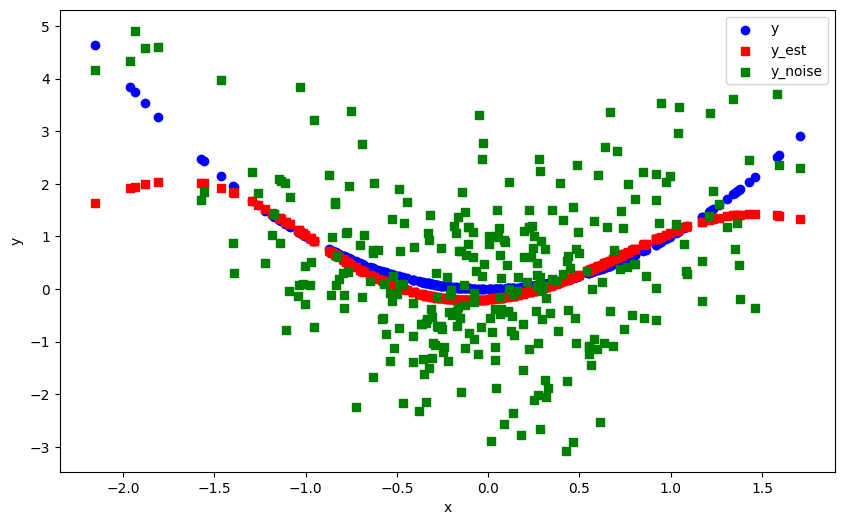

The programm is closed


In [8]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

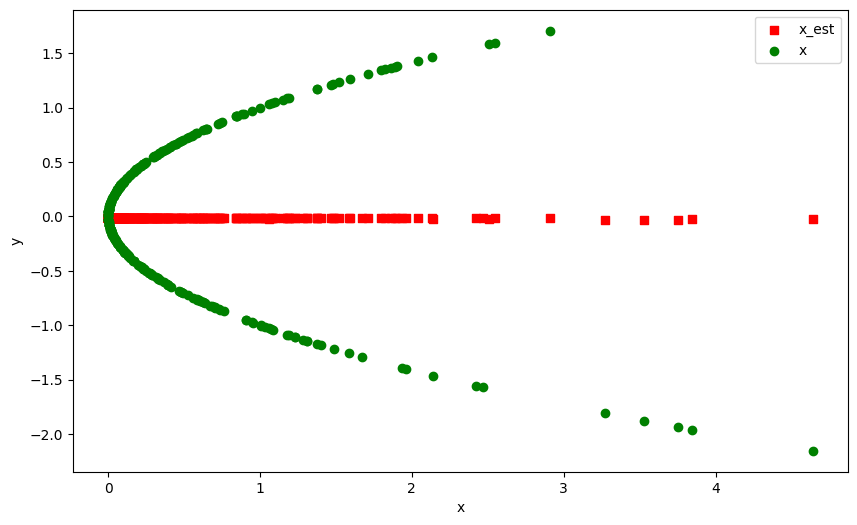

The programm is closed


In [9]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# qubic

In [10]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**3 + x1
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = x1**3 + x1+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:25, 74.06it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.21593576510278467
	score(model): 0.6466562956703505
Step 0: mle = 4.2966914345997855
Step 0: mse = 2.1534076584062025
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1017/33000.0 [00:11<06:02, 88.30it/s]


Inner iteration 1000
	h(W(model)): 0.01701398376625507
	score(model): 0.15453201392723462
Step 1000: mle = 1.3746706427772861
Step 1000: mse = 0.9892141245521687
Step 1000: Sigma = tensor([[0.3187, 0.0000],
        [0.0000, 1.4938]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2018/33000.0 [00:22<05:28, 94.43it/s]


Inner iteration 2000
	h(W(model)): 0.01684759975500505
	score(model): 0.15451982256821303
Step 2000: mle = 1.376208328972597
Step 2000: mse = 0.9891292809577474
Step 2000: Sigma = tensor([[0.3200, 0.0000],
        [0.0000, 1.4909]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3016/33000.0 [00:33<05:04, 98.32it/s]


Inner iteration 3000
	h(W(model)): 0.01684865144221881
	score(model): 0.1545126350561417
Step 3000: mle = 1.3761259209116545
Step 3000: mse = 0.9891219390648982
Step 3000: Sigma = tensor([[0.3200, 0.0000],
        [0.0000, 1.4909]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4016/33000.0 [00:44<05:07, 94.20it/s]


Inner iteration 4000
	h(W(model)): 0.016842472324027025
	score(model): 0.15451269345914595
Step 4000: mle = 1.3761883327893492
Step 4000: mse = 0.9891327022065376
Step 4000: Sigma = tensor([[0.3200, 0.0000],
        [0.0000, 1.4910]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5012/33000.0 [00:54<04:45, 97.86it/s]


Inner iteration 4999
	h(W(model)): 0.0168336192497911
	score(model): 0.15451321536111695
Step 4999: mle = 1.3762820935063118
Step 4999: mse = 0.9891550830183703
Step 4999: Sigma = tensor([[0.3200, 0.0000],
        [0.0000, 1.4909]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.4635149658612221
	score(model): 0.6192832675580232
Step 0: mle = 3.1018711483662296
Step 0: mse = 1.5435952067008862
Step 0: Sigma = tensor([[0.3230, 0.0000],
        [0.0000, 1.4939]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6014/33000.0 [01:04<04:29, 100.08it/s]


Inner iteration 1000
	h(W(model)): 0.004226918117463896
	score(model): 0.08549328022910982
Step 1000: mle = 1.6248074694547996
Step 1000: mse = 1.043328692597593
Step 1000: Sigma = tensor([[0.3957, 0.0000],
        [0.0000, 1.4149]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7017/33000.0 [01:14<04:23, 98.70it/s] 


Inner iteration 2000
	h(W(model)): 0.004234349870670062
	score(model): 0.08552339091657439
Step 2000: mle = 1.625250928943105
Step 2000: mse = 1.0427410755704039
Step 2000: Sigma = tensor([[0.3949, 0.0000],
        [0.0000, 1.4063]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8017/33000.0 [01:24<04:14, 97.98it/s] 


Inner iteration 3000
	h(W(model)): 0.004234041553902834
	score(model): 0.08552568110024271
Step 3000: mle = 1.6253031240077274
Step 3000: mse = 1.0427538175276734
Step 3000: Sigma = tensor([[0.3949, 0.0000],
        [0.0000, 1.4063]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9016/33000.0 [01:34<04:00, 99.69it/s] 


Inner iteration 4000
	h(W(model)): 0.004248614945381757
	score(model): 0.08554347424479049
Step 4000: mle = 1.6253691843202756
Step 4000: mse = 1.0429355420103197
Step 4000: Sigma = tensor([[0.3948, 0.0000],
        [0.0000, 1.4062]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10014/33000.0 [01:44<03:55, 97.42it/s]


Inner iteration 4999
	h(W(model)): 0.00427302651493866
	score(model): 0.08555840600686347
Step 4999: mle = 1.6251777427266458
Step 4999: mse = 1.0427500121071456
Step 4999: Sigma = tensor([[0.3949, 0.0000],
        [0.0000, 1.4062]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.711962119718275
	score(model): 1.788498494312638
Step 0: mle = 3.0518929325553157
Step 0: mse = 1.5519715821717677
Step 0: Sigma = tensor([[0.3979, 0.0000],
        [0.0000, 1.4092]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11017/33000.0 [01:54<03:41, 99.46it/s] 


Inner iteration 1000
	h(W(model)): 0.0011894883636984765
	score(model): 0.047687691497474316
Step 1000: mle = 1.8596878811400062
Step 1000: mse = 1.158375984068951
Step 1000: Sigma = tensor([[0.4343, 0.0000],
        [0.0000, 1.4121]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12015/33000.0 [02:04<03:34, 97.89it/s] 


Inner iteration 2000
	h(W(model)): 0.0010635838524462038
	score(model): 0.04634000978458845
Step 2000: mle = 1.810520014372787
Step 2000: mse = 1.105578077136662
Step 2000: Sigma = tensor([[0.4304, 0.0000],
        [0.0000, 1.3129]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13019/33000.0 [02:14<03:21, 99.09it/s] 


Inner iteration 3000
	h(W(model)): 0.0010609960268266327
	score(model): 0.04632498754666632
Step 3000: mle = 1.8100230731238207
Step 3000: mse = 1.1050044887395314
Step 3000: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 1.3119]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14018/33000.0 [02:24<03:10, 99.58it/s] 


Inner iteration 4000
	h(W(model)): 0.0010608539008756246
	score(model): 0.04632492509259554
Step 4000: mle = 1.8100262291379867
Step 4000: mse = 1.1050005201794713
Step 4000: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 1.3119]], grad_fn=<DiagEmbedBackward0>)


 45%|████▌     | 15013/33000.0 [02:34<03:03, 98.04it/s] 


Inner iteration 4999
	h(W(model)): 0.0010608194133654436
	score(model): 0.0463249841292811
Step 4999: mle = 1.8100299694030906
Step 4999: mse = 1.1050012780968417
Step 4999: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 1.3119]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.6021435188153816
	score(model): 0.6442672735749634
Step 0: mle = 3.359650437021365
Step 0: mse = 1.6450024231450442
Step 0: Sigma = tensor([[0.4335, 0.0000],
        [0.0000, 1.3149]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16016/33000.0 [02:44<02:54, 97.39it/s]


Inner iteration 1000
	h(W(model)): 0.0003532388419555943
	score(model): 0.02610687490772532
Step 1000: mle = 2.0596916013954107
Step 1000: mse = 1.1925205134063852
Step 1000: Sigma = tensor([[0.4383, 0.0000],
        [0.0000, 1.1325]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17020/33000.0 [02:55<02:44, 97.01it/s] 


Inner iteration 2000
	h(W(model)): 0.0002807290434119203
	score(model): 0.025174180485661054
Step 2000: mle = 1.9909377731670785
Step 2000: mse = 1.1693907158707961
Step 2000: Sigma = tensor([[0.4364, 0.0000],
        [0.0000, 1.1917]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18020/33000.0 [03:05<02:30, 99.41it/s] 


Inner iteration 3000
	h(W(model)): 0.0002810657837515329
	score(model): 0.02517304760020817
Step 3000: mle = 1.9908216088286197
Step 3000: mse = 1.169365179062706
Step 3000: Sigma = tensor([[0.4365, 0.0000],
        [0.0000, 1.1918]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19017/33000.0 [03:16<02:26, 95.52it/s]


Inner iteration 4000
	h(W(model)): 0.0002811109866054373
	score(model): 0.02517333875407225
Step 4000: mle = 1.9908414063317652
Step 4000: mse = 1.1693798114080012
Step 4000: Sigma = tensor([[0.4365, 0.0000],
        [0.0000, 1.1918]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20014/33000.0 [03:26<02:14, 96.83it/s]


Inner iteration 4999
	h(W(model)): 0.00028620303050219675
	score(model): 0.02517412874335512
Step 4999: mle = 1.99051011223538
Step 4999: mse = 1.1691771051719575
Step 4999: Sigma = tensor([[0.4367, 0.0000],
        [0.0000, 1.1921]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.685646816657215
	score(model): 1.7043931158072698
Step 0: mle = 2.997961541641847
Step 0: mse = 1.5972944212826068
Step 0: Sigma = tensor([[0.4397, 0.0000],
        [0.0000, 1.1891]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21015/33000.0 [03:36<02:01, 98.51it/s]


Inner iteration 1000
	h(W(model)): 0.00012102150786041932
	score(model): 0.014463192103762575
Step 1000: mle = 2.2944078778657024
Step 1000: mse = 1.2686884103838334
Step 1000: Sigma = tensor([[0.4151, 0.0000],
        [0.0000, 1.0409]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22011/33000.0 [03:47<01:54, 96.09it/s]


Inner iteration 2000
	h(W(model)): 8.13119063152179e-05
	score(model): 0.0139353292177926
Step 2000: mle = 2.2161187530731787
Step 2000: mse = 1.233979014999009
Step 2000: Sigma = tensor([[0.4214, 0.0000],
        [0.0000, 1.0530]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23013/33000.0 [03:57<01:42, 97.44it/s] 


Inner iteration 3000
	h(W(model)): 8.119638393555562e-05
	score(model): 0.01391846765768831
Step 3000: mle = 2.2134386538028457
Step 3000: mse = 1.2320102566589026
Step 3000: Sigma = tensor([[0.4214, 0.0000],
        [0.0000, 1.0518]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24014/33000.0 [04:07<01:33, 96.58it/s]


Inner iteration 4000
	h(W(model)): 8.119079115731509e-05
	score(model): 0.013918282865029392
Step 4000: mle = 2.213409935303411
Step 4000: mse = 1.2319880435117248
Step 4000: Sigma = tensor([[0.4214, 0.0000],
        [0.0000, 1.0518]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25017/33000.0 [04:18<01:22, 97.00it/s]


Inner iteration 4999
	h(W(model)): 8.200067162711377e-05
	score(model): 0.013910243686635605
Step 4999: mle = 2.2120688914218984
Step 4999: mse = 1.2314864589457617
Step 4999: Sigma = tensor([[0.4214, 0.0000],
        [0.0000, 1.0522]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.637810363613322
	score(model): 1.6500930612017743
Step 0: mle = 3.926394053040101
Step 0: mse = 1.8207870497411525
Step 0: Sigma = tensor([[0.4244, 0.0000],
        [0.0000, 1.0492]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26018/33000.0 [04:28<01:10, 98.94it/s]


Inner iteration 1000
	h(W(model)): 0.0001330951898137478
	score(model): 0.00860290270777627
Step 1000: mle = 2.7114290505480625
Step 1000: mse = 1.4621482336599938
Step 1000: Sigma = tensor([[0.3751, 0.0000],
        [0.0000, 1.0205]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27016/33000.0 [04:38<01:00, 99.60it/s] 


Inner iteration 2000
	h(W(model)): 2.6461422979462412e-05
	score(model): 0.007939134408167547
Step 2000: mle = 2.5315713408488545
Step 2000: mse = 1.2978412407134352
Step 2000: Sigma = tensor([[0.3913, 0.0000],
        [0.0000, 0.9083]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28011/33000.0 [04:49<00:53, 93.79it/s]


Inner iteration 3000
	h(W(model)): 2.6018143349126888e-05
	score(model): 0.007929272624160455
Step 3000: mle = 2.528544208251299
Step 3000: mse = 1.2960967688006129
Step 3000: Sigma = tensor([[0.3912, 0.0000],
        [0.0000, 0.9079]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29015/33000.0 [04:59<00:41, 95.04it/s] 


Inner iteration 4000
	h(W(model)): 2.601110652644678e-05
	score(model): 0.007929166901765402
Step 4000: mle = 2.5285125047268395
Step 4000: mse = 1.2960803203265487
Step 4000: Sigma = tensor([[0.3912, 0.0000],
        [0.0000, 0.9079]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30011/33000.0 [05:09<00:30, 96.81it/s] 


Inner iteration 5000
	h(W(model)): 2.600955941201022e-05
	score(model): 0.007929164809286638
Step 5000: mle = 2.528512330243839
Step 5000: mse = 1.2960802465584422
Step 5000: Sigma = tensor([[0.3912, 0.0000],
        [0.0000, 0.9079]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31011/33000.0 [05:19<00:20, 98.22it/s] 


Inner iteration 6000
	h(W(model)): 2.6647252888700734e-05
	score(model): 0.007929628397495636
Step 6000: mle = 2.5284643893172865
Step 6000: mse = 1.295938574008557
Step 6000: Sigma = tensor([[0.3912, 0.0000],
        [0.0000, 0.9077]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32021/33000.0 [05:30<00:09, 98.87it/s] 


Inner iteration 7000
	h(W(model)): 3.842151412047912e-05
	score(model): 0.007947346412672928
Step 7000: mle = 2.5303856514434027
Step 7000: mse = 1.297198575384325
Step 7000: Sigma = tensor([[0.3911, 0.0000],
        [0.0000, 0.9083]], grad_fn=<DiagEmbedBackward0>)


100%|██████████| 33000/33000.0 [05:40<00:00, 97.04it/s] 


Inner iteration 7999
	h(W(model)): 3.430889068001264e-05
	score(model): 0.007937952873860038
Step 7999: mle = 2.528631573531216
Step 7999: mse = 1.2960380692365008
Step 7999: Sigma = tensor([[0.3913, 0.0000],
        [0.0000, 0.9076]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 2.4721e+00],
        [3.3508e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3913, 0.0000],
        [0.0000, 0.9076]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 2.47214992e+00]
 [3.35076161e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39126503 0.        ]
 [0.         0.90763332]]


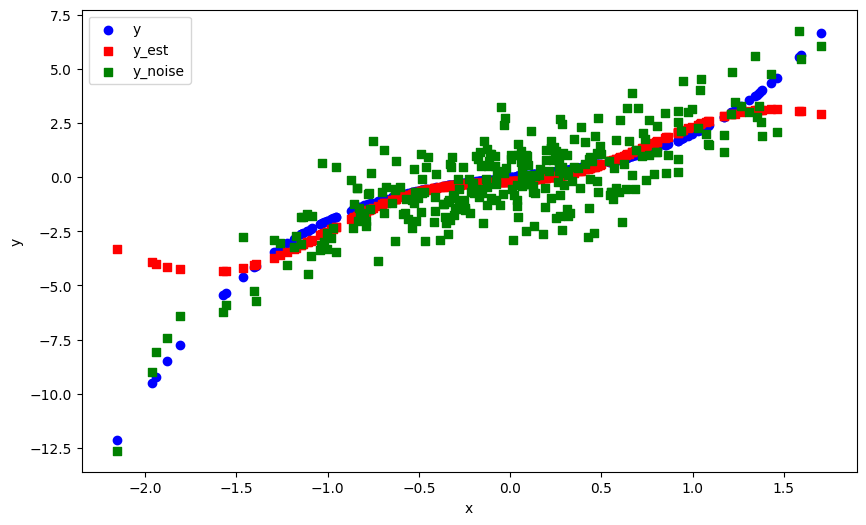

The programm is closed


In [11]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

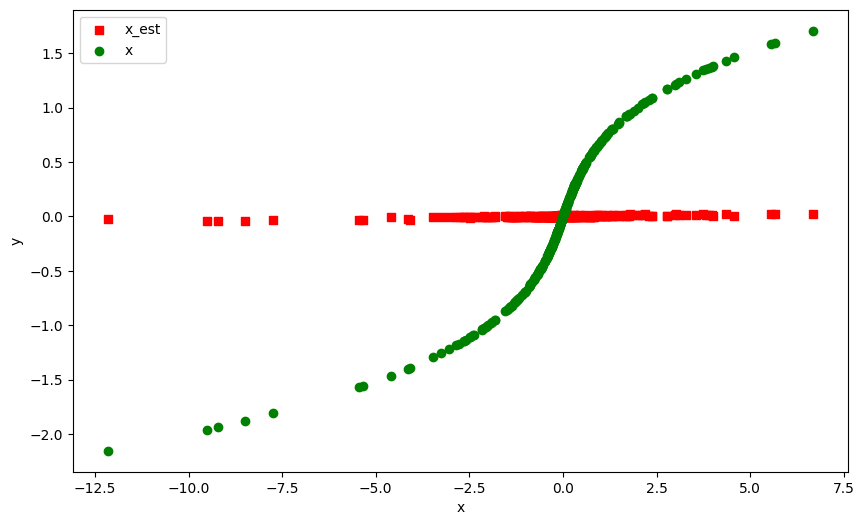

The programm is closed


In [12]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")